In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import os

In [2]:
#path = 'F:/data_glacier_internship/week7/dataset/bank/bank-additional/bank-additional/'

In [3]:
#data = 'bank-additional-full.csv'

In [4]:
#df = pd.read_csv(path + data, sep=';')

In [5]:
df = pd.read_csv('/Users/vikasvig/data_science_bank_marketing_Campaign/dataset/bank/bank-additional/bank-additional-full.csv', sep=';')

In [6]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## -----------------------------------------------------------------------------------------

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### There are no null values

## -----------------------------------------------------------------------------------------

In [8]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

### An overview of the numeric features of the dataset

## -----------------------------------------------------------------------------------------

# Categorical Feature Exploration

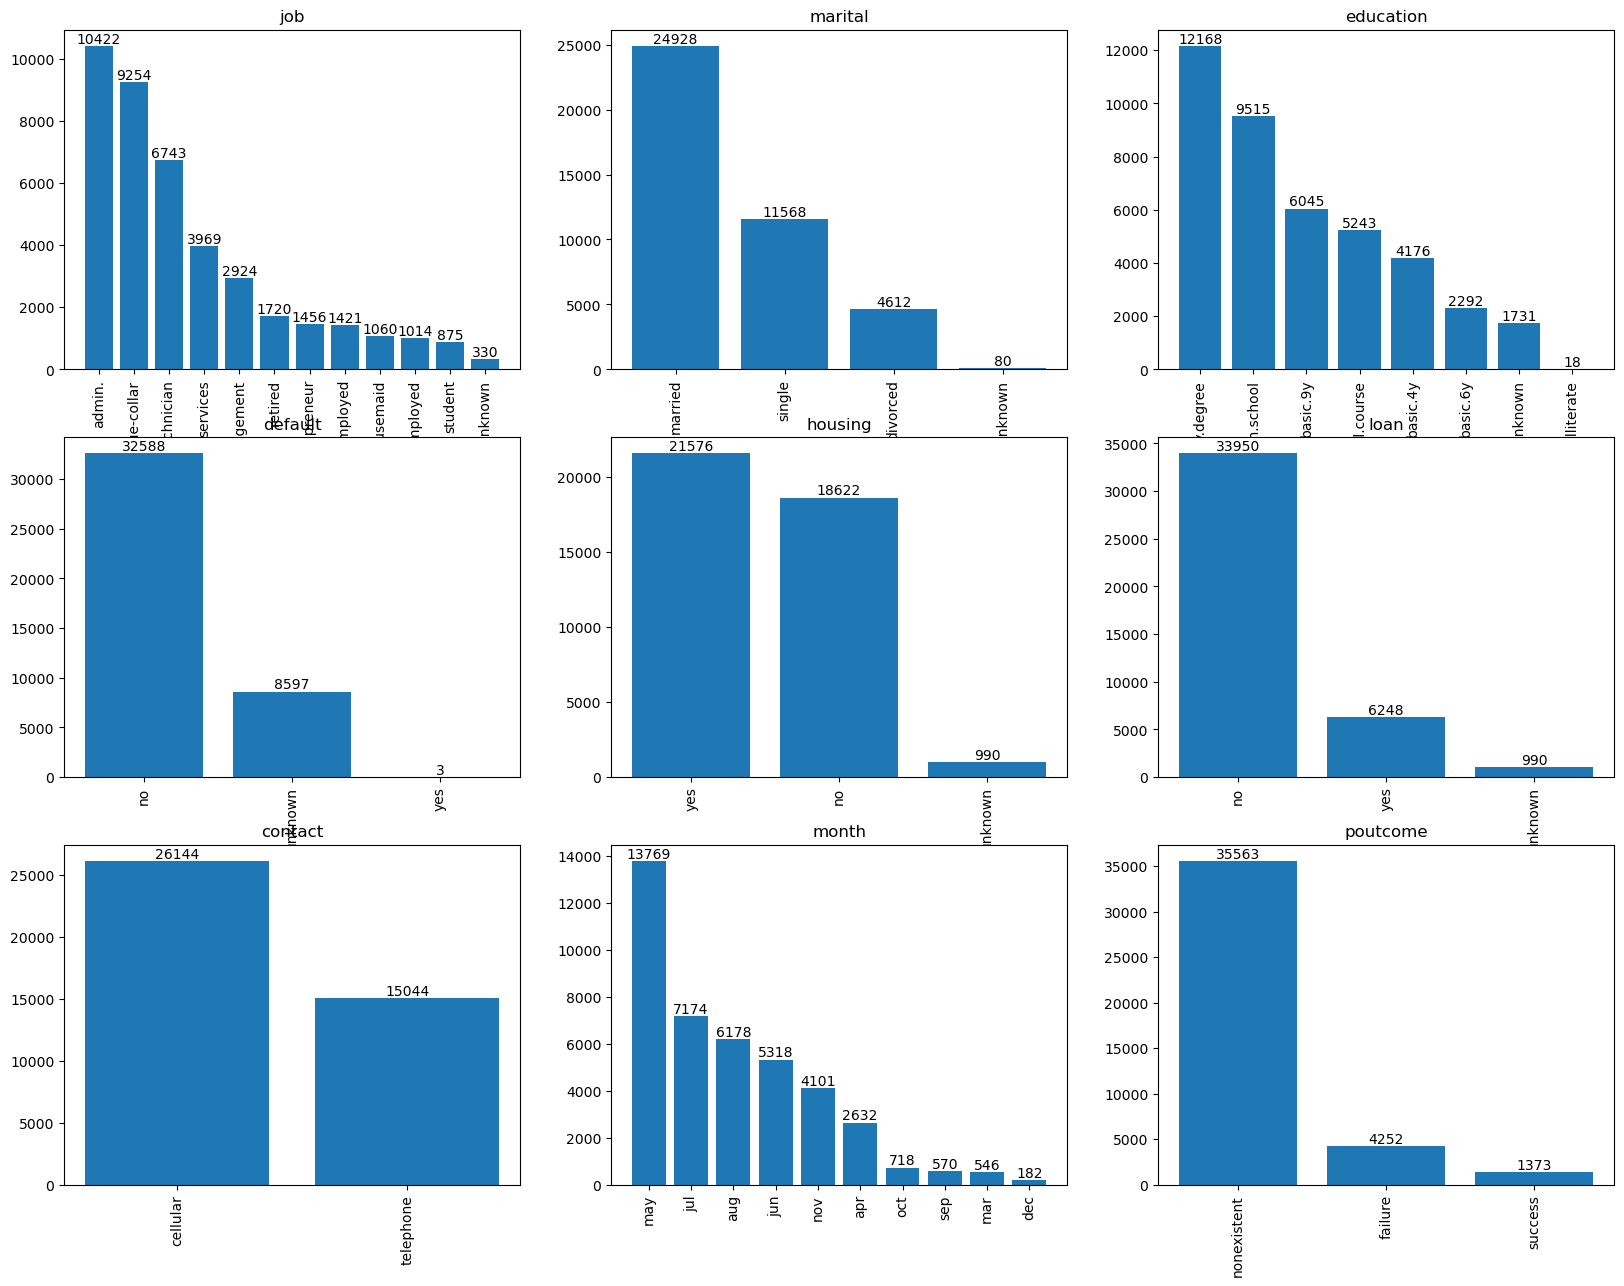

In [9]:
import matplotlib.pyplot as plt
import numpy as np

cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for i, cat_column in enumerate(cat_columns):
    row, col = divmod(i, 3)
    value_counts = df[cat_column].value_counts()
    x_pos = np.arange(len(value_counts))
    axs[row, col].bar(x_pos, value_counts.values, tick_label=value_counts.index)
    axs[row, col].set_title(cat_column)
    axs[row, col].tick_params(axis='x', rotation=90)
    
    # Add the value of each bar at the top
    for j, v in enumerate(value_counts.values):
        axs[row, col].text(j, v, str(v), ha='center', va='bottom')

plt.show()

## Additional visualization for jobs

In [10]:
import squarify

x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(255, 105, 180)','rgb(0, 127, 255)',
          'rgb(0, 255, 127)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)',
         'rgb(0, 245, 255)', 'rgb(255, 182, 193)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    
    for name in job_names:
        annotations.append(
            dict(
                x = r['x']+(r['dx']/2),
                y = r['y']+(r['dy']/2),
                text = values[counter],
                showarrow = False
            )
        )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0

trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Grid plot of Occupation Counts',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
)

figure = dict(data=[trace0], layout=layout)
iplot(figure)

## Pairplot for marital status

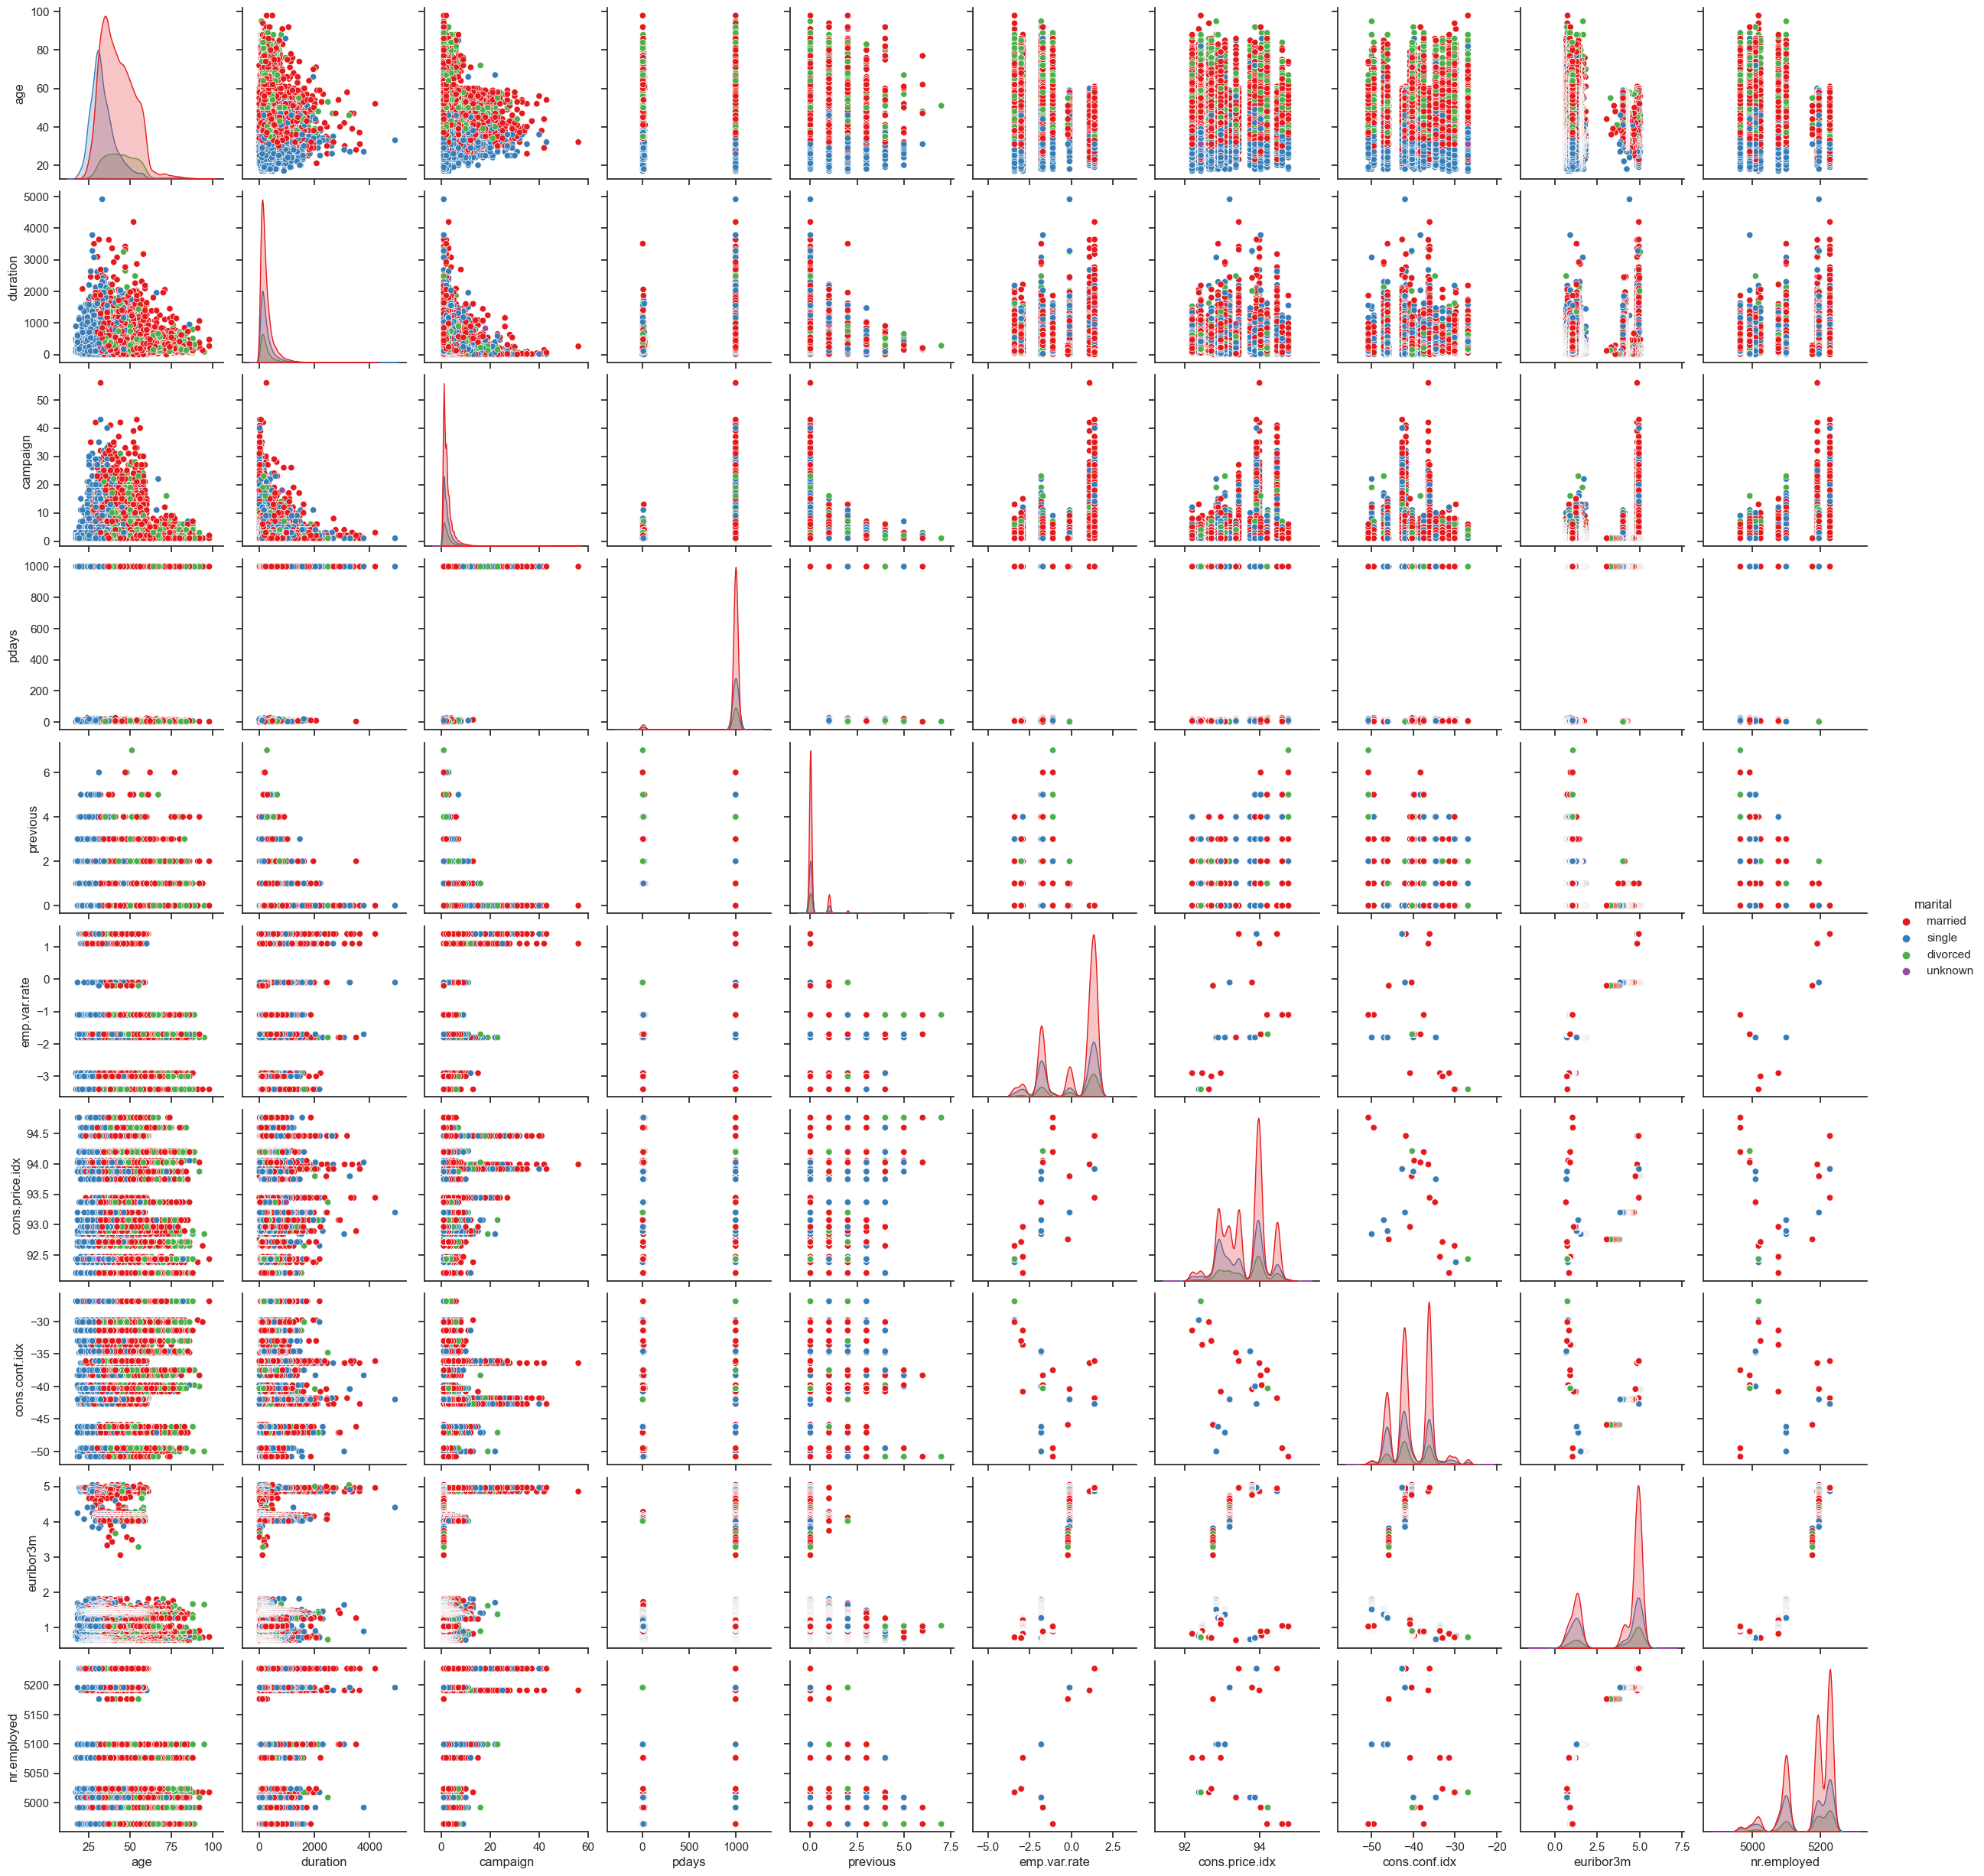

In [11]:
sns.set(style="ticks")

sns.pairplot(df, hue="marital", palette="Set1")
plt.show()

## Pairplot for education

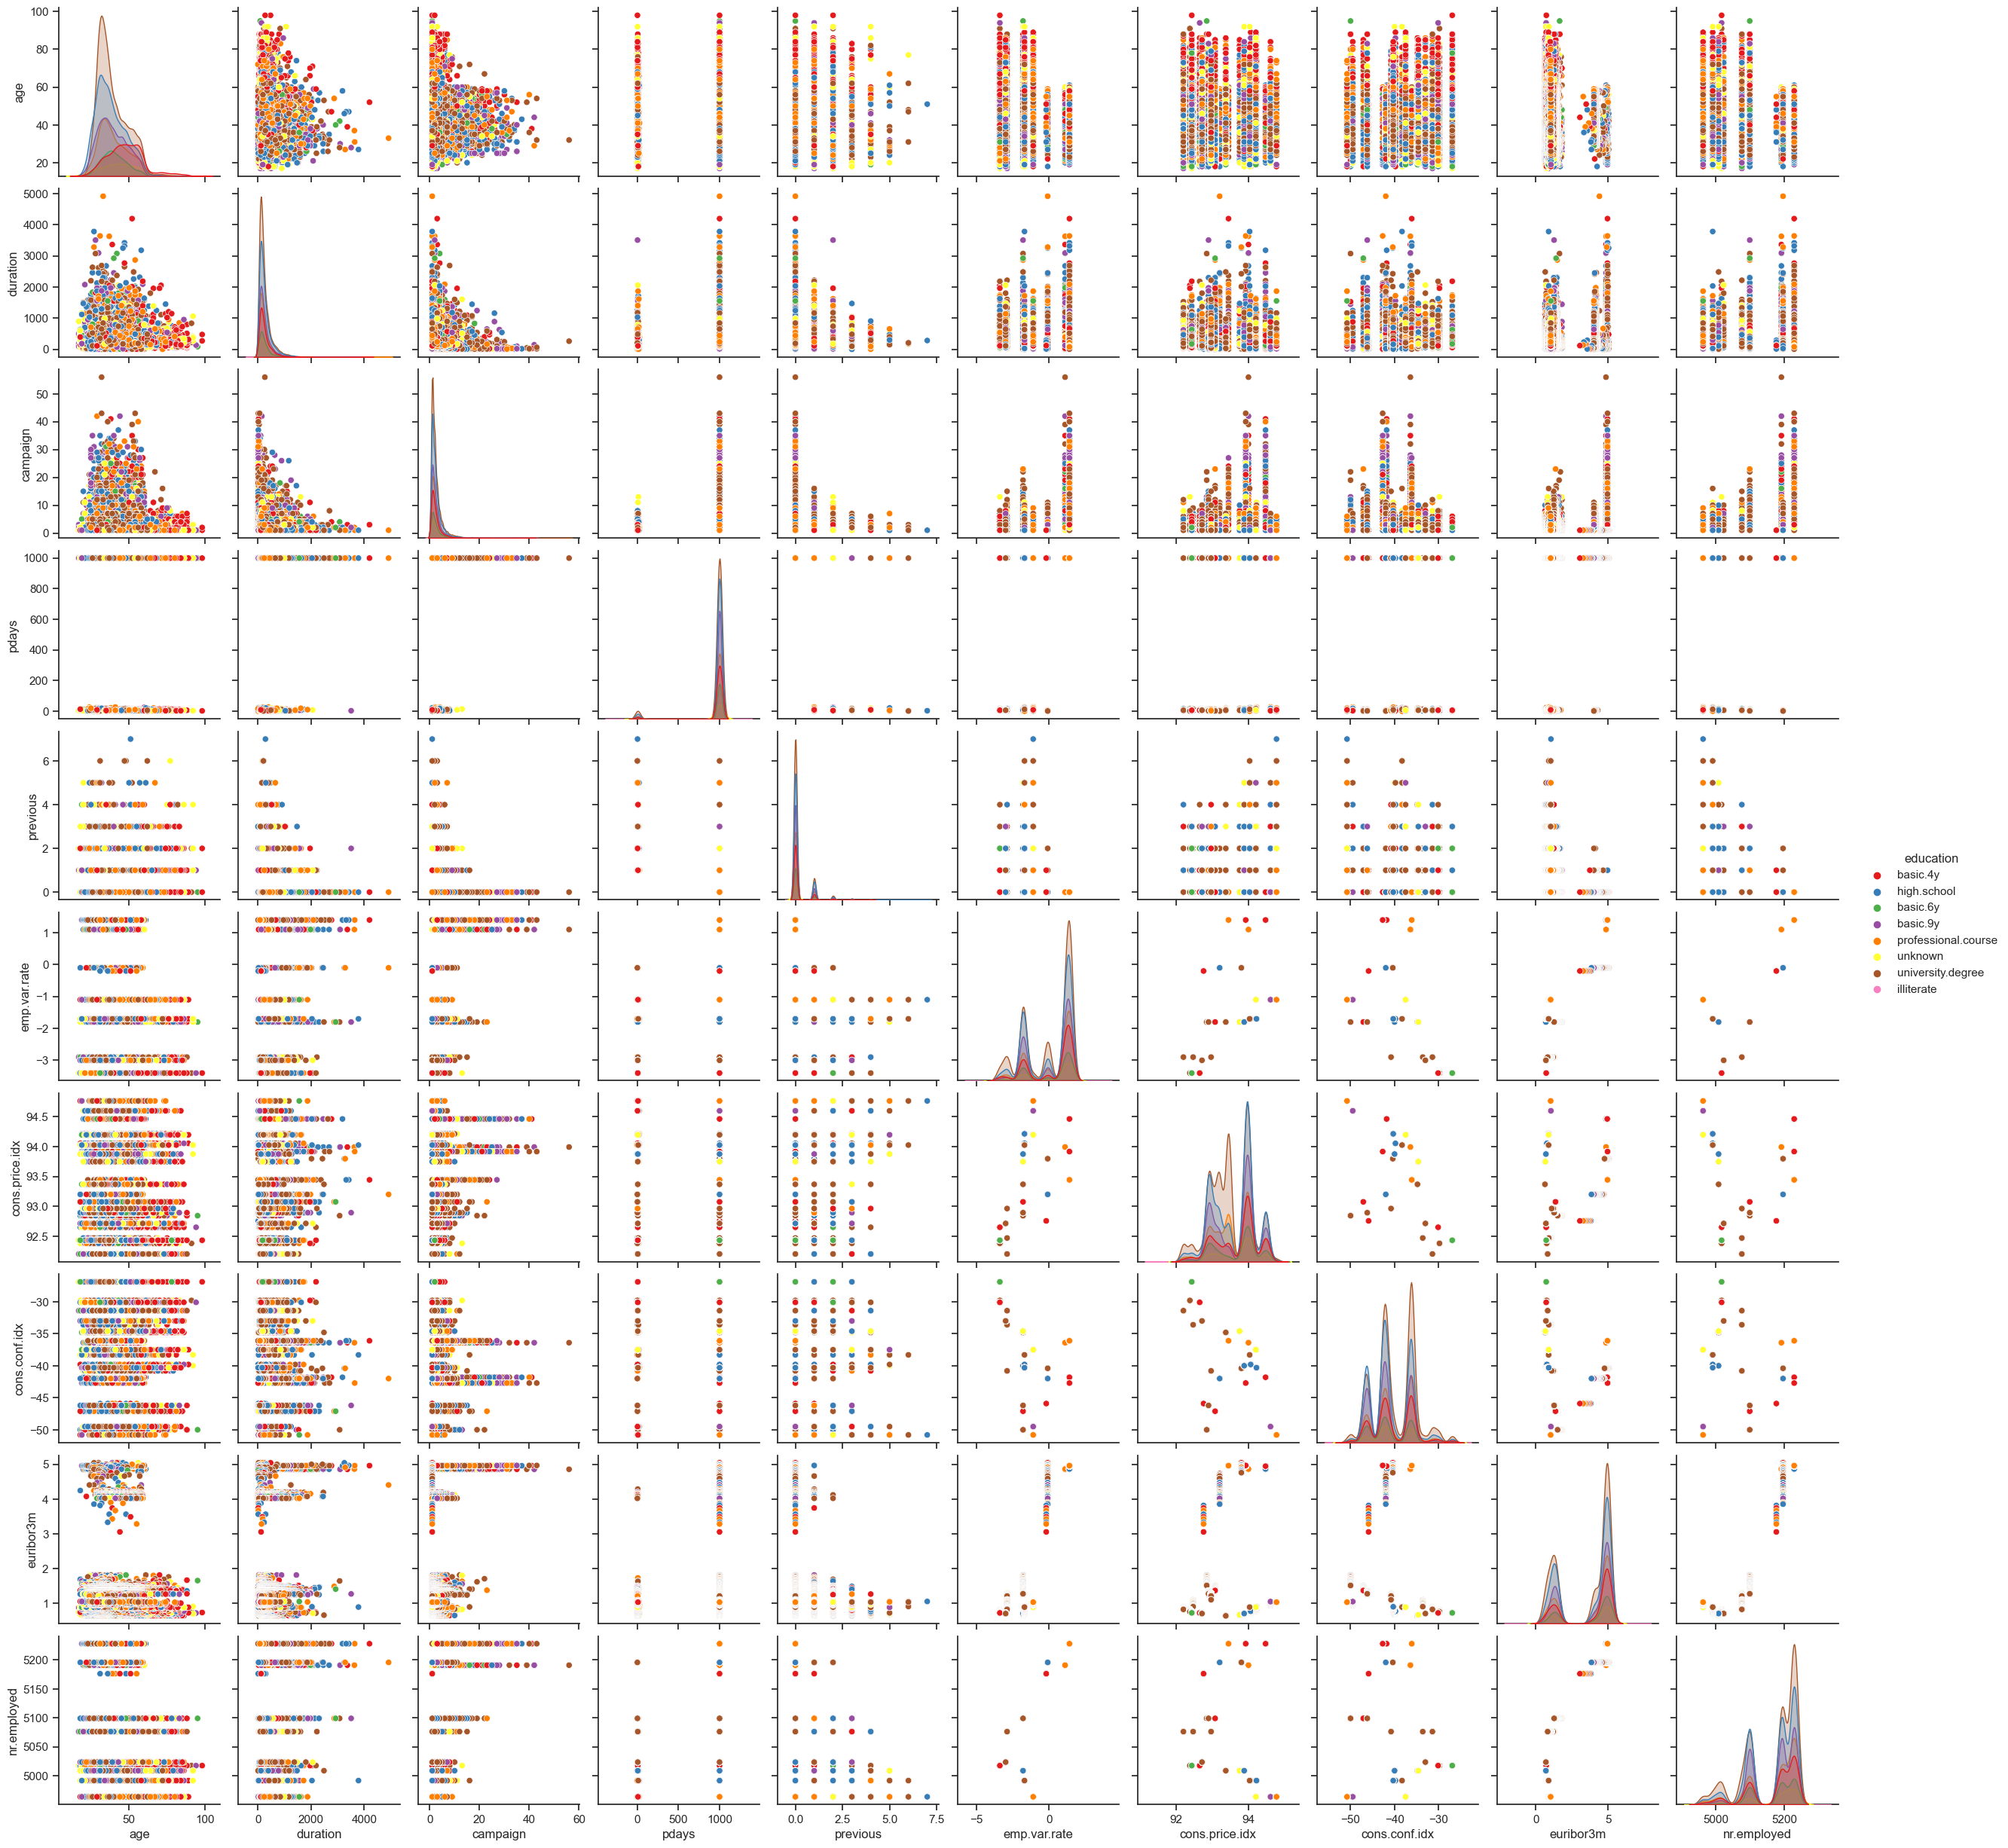

In [12]:
sns.set(style="ticks")

sns.pairplot(df, hue="education", palette="Set1")
plt.show()

# Analysis:

## Job

It can be observed that the majority of bank customers belonged to one of three job categories: admin, blue-collar, and technician. Among these, the admin job category had the largest number of customers, followed by blue-collar and technician categories, respectively.

## Marital

The majority of customers in the dataset are classified as married, whereas the number of customers who are divorced or widowed is relatively small.

## Education

The analysis reveals that a large proportion of the customers have obtained university degree.

## Default

It can be observed that the majority of customers in the dataset have a clean credit history, with no instances of defaulting on credit payments.

## Housing

One interesting observation is that the difference in proportions between customers who have a housing loan and those who do not is relatively small, comprising only about 2946 people. However, it is noteworthy that the number of customers who have a housing loan is greater than those who do not have one. Also, we observed that there are about 990 people for which the information is unknown.

## Loan

It can be observed that the number of customers who have loans, other than housing loans, is significantly lower than the number of customers who have housing loans, along with other types of loans.

## Contact

It can be observed that the most frequently used method of the telemarketing campaign was to contact customers through their cellular telephones.

## Month

It can be observed that the month of May had the highest number of customer contacts, presumably as part of the most recent marketing campaign.

## Poutcome

The analysis indicates that the proportion of customers who subscribed to term deposits from the previous marketing campaign was the lowest, whereas the highest proportion of customers had an nonexistent subscription status.

## -----------------------------------------------------------------------------------------

# Numerical Feature Exploration

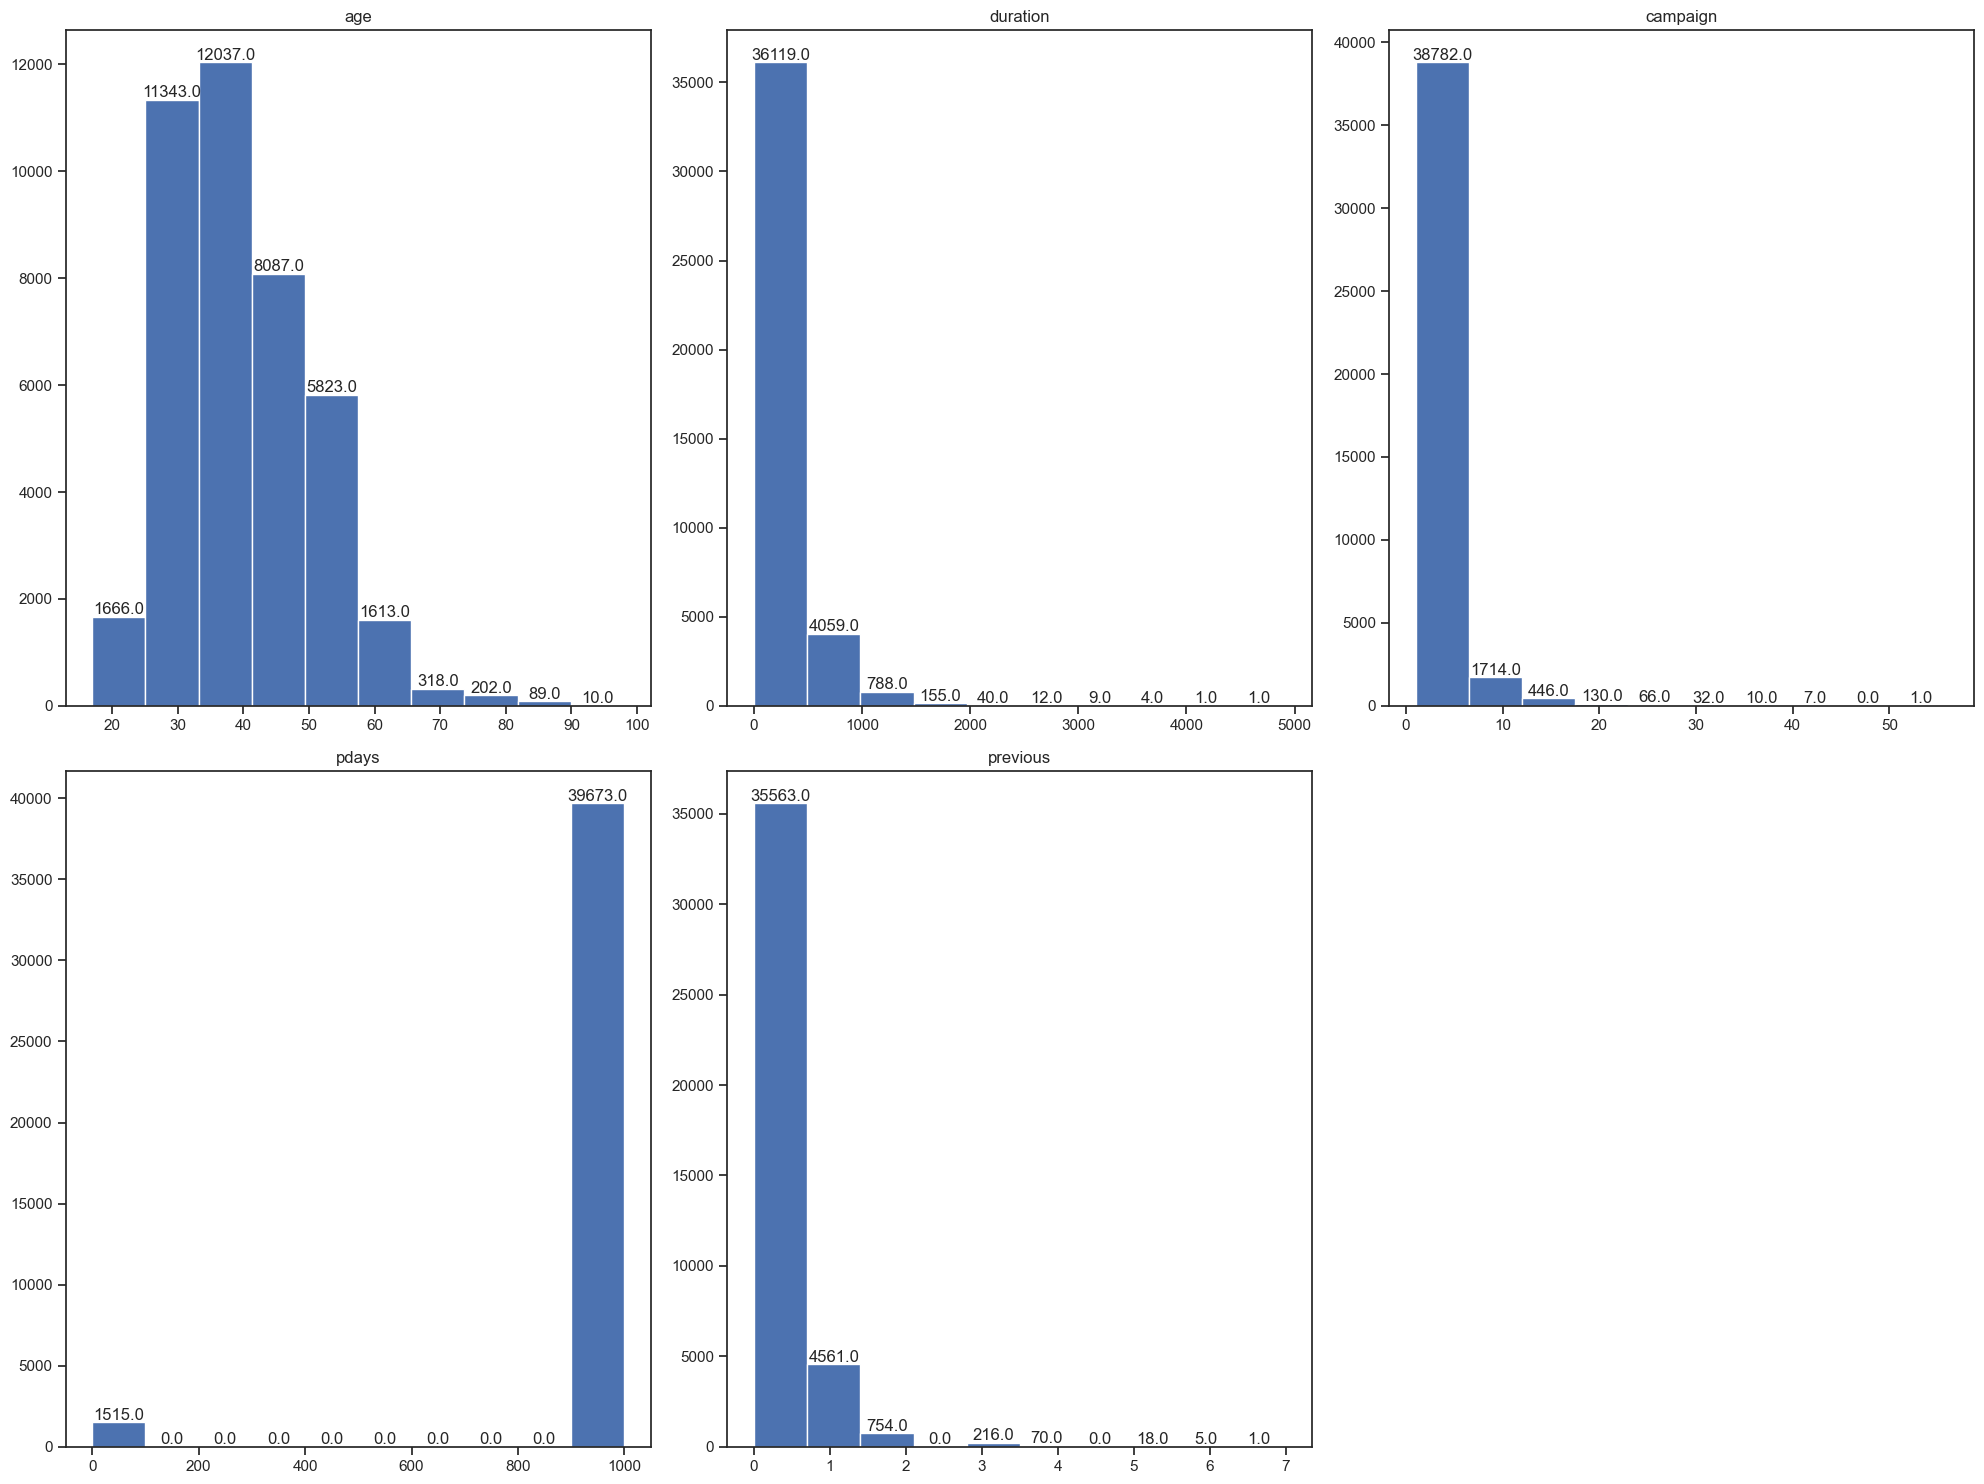

In [13]:
num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Remove the last subplot if there is an odd number of subplots
if len(num_columns) % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Plot the histograms and add labels
for i, num_column in enumerate(num_columns):
    row = i // 3
    col = i % 3
    axs[row, col].hist(df[num_column])
    axs[row, col].set_title(num_column)
    for patch in axs[row, col].patches:
        axs[row, col].annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
target_df = df.loc[df['y'] == 'yes']

occupations = df["job"].unique().tolist()

management = target_df["age"].loc[target_df["job"] == "management"].values
admin = target_df["age"].loc[target_df["job"] == "admin."].values
technician = target_df["age"].loc[target_df["job"] == "technician"].values
services = target_df["age"].loc[target_df["job"] == "services"].values
retired = target_df["age"].loc[target_df["job"] == "retired"].values
blue_collar = target_df["age"].loc[target_df["job"] == "blue-collar"].values
unemployed = target_df["age"].loc[target_df["job"] == "unemployed"].values
entrepreneur = target_df["age"].loc[target_df["job"] == "entrepreneur"].values
housemaid = target_df["age"].loc[target_df["job"] == "housemaid"].values
self_employed = target_df["age"].loc[target_df["job"] == "self-employed"].values
student = target_df["age"].loc[target_df["job"] == "student"].values
unknown = target_df["age"].loc[target_df["job"] == "unknown"].values


ages = [housemaid, services, admin, blue_collar, technician,
       retired, management, unemployed, self_employed, unknown,
       entrepreneur, student]

colors = ['rgb(255, 105, 180)','rgb(0, 127, 255)',
          'rgb(0, 255, 127)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)',
         'rgb(0, 245, 255)', 'rgb(255, 182, 193)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

# Analysis:

## Age

The analysis suggests that the largest customer segment falls within the age range of 30-50 years old. We also see that the occupation with the youngest distribution of ages is "student", whereas the occupation with the oldest distribution of ages is "retired". This is an expected result. 

## Duration

The analysis indicates that the maximum duration of the last contact was 36119 seconds.

## Campaign

It can be observed that a total of 38782 contacts were made during the course of this marketing campaign.

## Pdays

The analysis reveals that the highest number of days elapsed since a client was last contacted from a previous campaign was 39673, while the lowest number was 1515 days.

## Previous

It can be observed that the highest number of recorded contacts, totaling 35563, was made prior to the current marketing campaign.

## -----------------------------------------------------------------------------------------

# Target Distribution

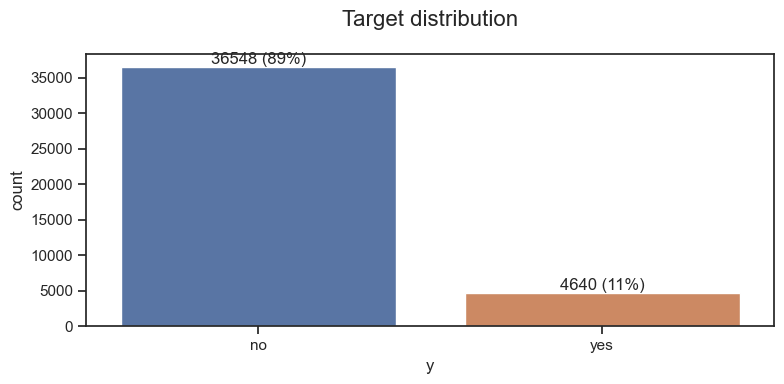

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))

# Plot the countplot
sns.countplot(x=df['y'], ax=ax)

# Calculate absolute and relative value counts
abs_vals = df['y'].value_counts()
rel_vals = df['y'].value_counts(normalize=True) * 100

# Create labels with absolute and relative counts
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

# Add labels to the bars
for i, container in enumerate(ax.containers):
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=12)

# Set the title
ax.set_title('Target distribution', fontsize=16, pad=20)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Alternative visualization (pie chart)

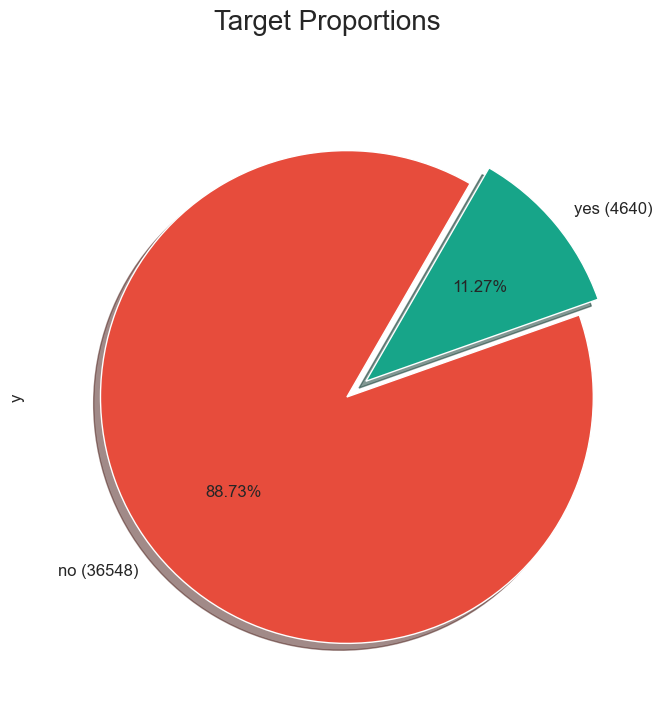

In [16]:
f, ax = plt.subplots(figsize=(16,8))

colors = ["#E74C3C", "#17A589"]
labels ="no (36548)", "yes (4640)"

plt.suptitle('Target Proportions', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=60)

plt.show()

# Analysis: 

It can be observed that the number of customers who declined the term deposit offer in the current campaign is significantly greater than the number of customers who accepted it, with only a few thousand customers accepting the offer.

## -----------------------------------------------------------------------------------------

# Plotting Correlation Matrix of the Numerical and Float type features

/var/folders/k4/bbbhzd8j5rdclqt5pdcjfl9w0000gn/T/ipykernel_56529/2115708014.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



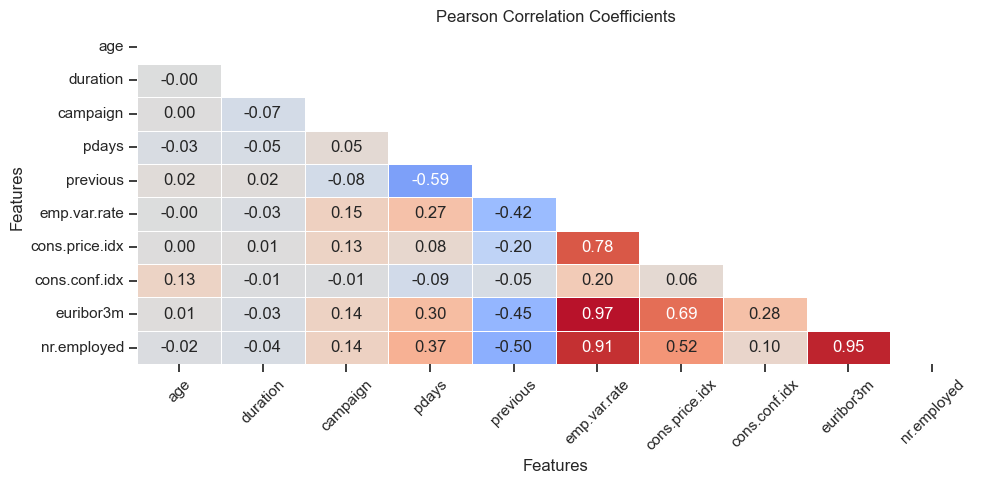

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

# Compute correlation matrix and create mask
df_corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Create heatmap
sns.heatmap(data=df_corr, vmin=-1, vmax=1, mask=mask,
            cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=.5, cbar=False, ax=ax)

# Rotate x-axis labels for readability
ax.tick_params(axis='x', labelrotation=45)

# Set axis labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Features')
ax.set_title('Pearson Correlation Coefficients')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

### Numeric and Float features which are the most correlated with `y` are:

|Feature| Corr with `y`|
|:---|---|
|duration|0.41|
|pdays|-0.32|
|nr.employed|-0.35|
|euribor3m|-0.31|
|emp.var.rate|-0.30|

## -----------------------------------------------------------------------------------------

# Exploring Outliers and Interquartile Range using Boxplots in Numeric Data

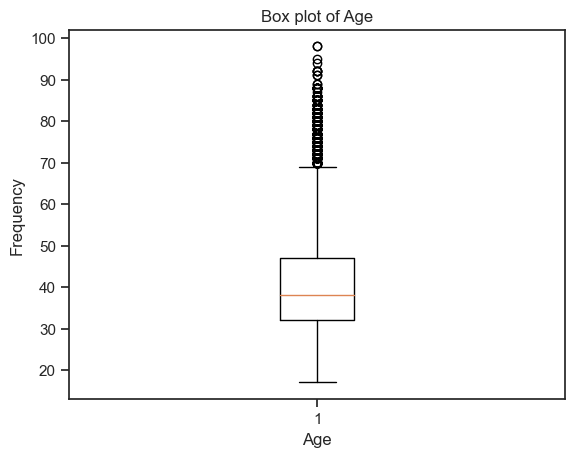

In [18]:
# Extract the age column
age_data = df['age']

# Create a box plot of the age data
plt.boxplot(age_data)

# Set the title and axis labels
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

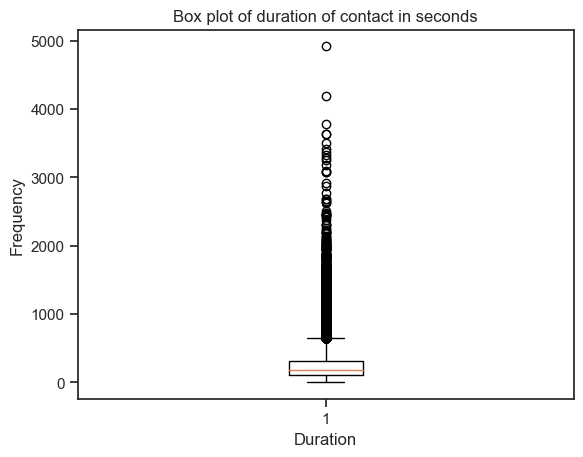

In [19]:
# Extract the duration column
duration_data = df['duration']

# Create a box plot of the age data
plt.boxplot(duration_data)

# Set the title and axis labels
plt.title('Box plot of duration of contact in seconds')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Display the plot
plt.show()

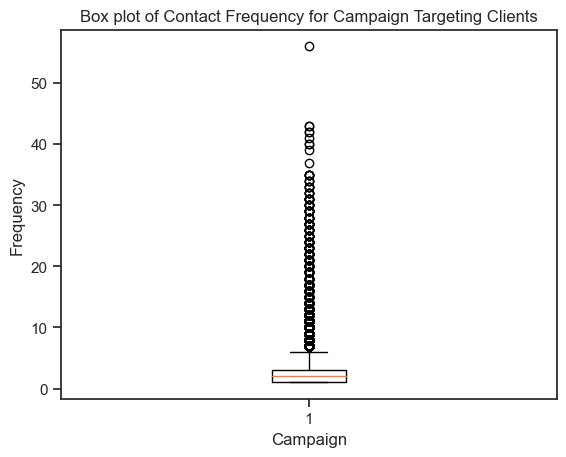

In [20]:
# Extract the campaign column
campaign_data = df['campaign']

# Create a box plot of the campaign data
plt.boxplot(campaign_data)

# Set the title and axis labels
plt.title('Box plot of Contact Frequency for Campaign Targeting Clients')
plt.xlabel('Campaign')
plt.ylabel('Frequency')

# Display the plot
plt.show()

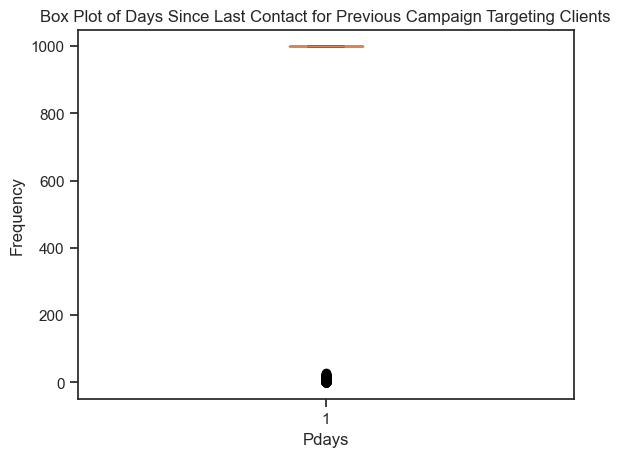

In [21]:
# Extract the pdays column
pdays_data = df['pdays']

# Create a box plot of the pdays data
plt.boxplot(pdays_data)

# Set the title and axis labels
plt.title('Box Plot of Days Since Last Contact for Previous Campaign Targeting Clients')
plt.xlabel('Pdays')
plt.ylabel('Frequency')

# Display the plot
plt.show()

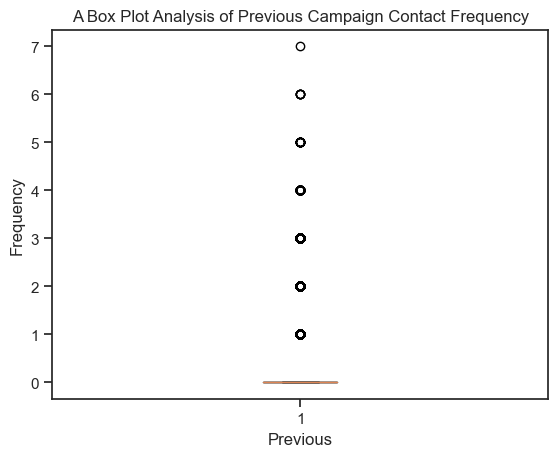

In [22]:
# Extract the pdays column
previous_data = df['previous']

# Create a box plot of the previous data
plt.boxplot(previous_data)

# Set the title and axis labels
plt.title('A Box Plot Analysis of Previous Campaign Contact Frequency')
plt.xlabel('Previous')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Based on the boxplots, the following observations can be made:

1) Outliers are present in all of the data.
2) The interquartile range for the numeric variables, except for age, is relatively narrow.

## -----------------------------------------------------------------------------------------

# Recommendation

Based on the analysis of the bank-additional-full dataset, the following recommendations can be made for ABC Bank regarding buying their term deposit product:

1) Age is an important factor to consider. The observation shows that the customers between the ages of 30-50 years old dominated in the dataset. Therefore, choosing a different age range of customers might allow the bank to sell more deposit products. 

2) Customers without existing housing loans are more likely open to buying a term deposit product.

3) Customers with a university degree may be more financially savvy and may be more interested in investing in a term deposit product.

4) Based on the data, using cellular phones as the primary mode of communication for marketing campaigns is recommended, as it has been shown to be more efficient.

5) Targeting the period between May and August may provide the highest opportunity to reach a large number of customers, and may be a good time to launch the product.

6) In the dataset, we observed most of the customers were married. Probably, the bank can focus on unmarried customers to see if it adds more value to the success rate of the campaign.

By incorporating these factors into their business plan, ABC Bank can better understand which customers are most likely to buy their term deposit product, and can target their marketing efforts accordingly.

## -----------------------------------------------------------------------------------------